TODO:


In [75]:
%load_ext autoreload
%autoreload 2
import data_extraction.get_indices as get_indices
import parse_data.prepare_data as prepare_data
import globals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from plotting import plot_octagon, plot_trajectory
import data_extraction.get_indices as get_indices
import plotting.plot_probability_chose_wall as plot_probability_chose_wall
import data_strings
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
import analysis.wall_choice as wall_choice
import data_extraction.extract_trial as extract_trial
import utils.pad_and_reshape_array as utils
import plotting.wall_visibility_order_testing_functions as wall_visibility_order_testing_functions
import parse_data.flip_rotate_trajectories as flip_rotate_trajectories
import plotting.flipped_rotated_trajectory_testing_functions as flipped_rotated_trajectory_testing_functions


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
# notebook global variables

wall_sep = None
trial_type = globals.HIGH_LOW
player_id = 0
n_cols = 12

In [77]:
# prepare the data

data_folder = data_strings.DATA_FOLDER
json_filenames_all_social = data_strings.JSON_FILENAMES_SOCIAL
json_filenames_all_solo = data_strings.JSON_FILENAMES_SOLO

# specify session number
json_filename = json_filenames_all_social[3]

_, trial_list = prepare_data.prepare_data(data_folder, json_filename, combine=True)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.


In [ ]:
# filter the trial list for trialtype and wallsep

# # filter trial list for given_wallLow trialtype
# trial_indices = get_indices.get_trials_trialtype(trial_list, trial_type=trial_type)
# trial_list_filtered = [trial_list[i] for i in trial_indices]

trial_list_filtered = trial_list

# filter trial list for wall separations if specified
if wall_sep:
    trial_indices = get_indices.get_trials_with_wall_sep(trial_list_filtered, wall_sep=wall_sep)
    trial_list_filtered = [trial_list_filtered[i] for i in trial_indices]


In [79]:
# gather data for session

# get a full trial list of flipped and rotated trials for this session
trial_list_flipped_rotated = []
for i in range(len(trial_list_filtered)):
    trial_list_flipped_rotated.append(flip_rotate_trajectories.flip_rotate_trajectories(trial_list=trial_list_filtered, trial_index=0))




In [80]:
# import pickle
# with open("my_variable.pkl", "rb") as f:
#     my_variable = pickle.load(f)

# trial_list_filtered = my_variable

In [62]:
# get walls and choice for session
high_walls_session = np.full(len(trial_list_filtered), np.nan, dtype=float)
low_walls_session = np.full(len(trial_list_filtered), np.nan, dtype=float)
for i,trial in enumerate(trial_list_filtered):
    walls = get_indices.get_walls(trial_list=trial_list_filtered, trial_index=i)
    high_walls_session[i] = walls[0]
    low_walls_session[i] = walls[1]

chosen_walls_session = get_indices.get_chosen_walls(trial_list_filtered)

In [63]:
chosen_walls_session

array([5., 1., 3., 3., 2., 7., 3., 6., 8., 5., 6., 1., 2., 2., 2., 7., 4.,
       2., 8., 4., 5., 4., 8., 6., 4., 4., 8., 4., 3., 5., 4., 4., 6., 8.,
       8., 6., 4., 8., 3., 6., 7., 4., 2., 8., 5., 7., 3., 3., 4., 3., 1.,
       8., 1., 3., 3., 8., 8., 6., 1., 6., 5., 4., 8., 3., 3., 3., 7., 4.,
       7., 3., 3., 1., 4., 1., 2., 6., 8., 5., 8., 4., 3., 1., 4., 4., 1.,
       6., 5., 5., 5., 5., 8., 7., 3., 6., 6., 7., 2., 5., 6., 5., 3., 3.,
       4., 4., 6., 2., 7., 6., 5., 3., 5., 1., 6., 1., 1., 2., 8., 6., 4.,
       4., 8., 3., 2., 4., 3., 6., 7., 8., 1., 7., 2., 7., 1., 4., 5., 4.])

In [64]:
# # reshape relevant arrays to fit with n_rows,n_cols grid (pad with np.nan) 

high_walls_session_reshaped = utils.pad_and_reshape_array(high_walls_session, n_cols)
low_walls_session_reshaped = utils.pad_and_reshape_array(low_walls_session, n_cols)
chosen_walls_session_reshaped = utils.pad_and_reshape_array(chosen_walls_session, n_cols)


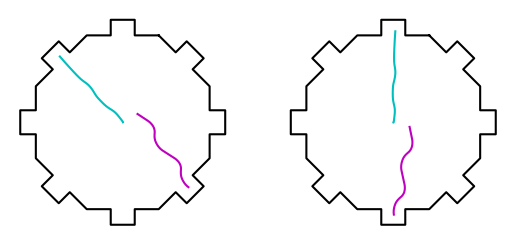

High wall, Low wall, and Chosen wall are: 8, 4, 8


In [74]:
trial_index = 37
(high, low, chosen) = flipped_rotated_trajectory_testing_functions.plot_single_trial_flip_rotate_trajectories(trial_list_filtered,
                                                                                                               chosen_walls_session,
                                                                                                                 trial_index=trial_index,
                                                                                                                   flip=True)
print(f"High wall, Low wall, and Chosen wall are: {high}, {low}, {chosen}")

In [66]:
len(trial_list_filtered)

136

Plotting up to trial number: 107


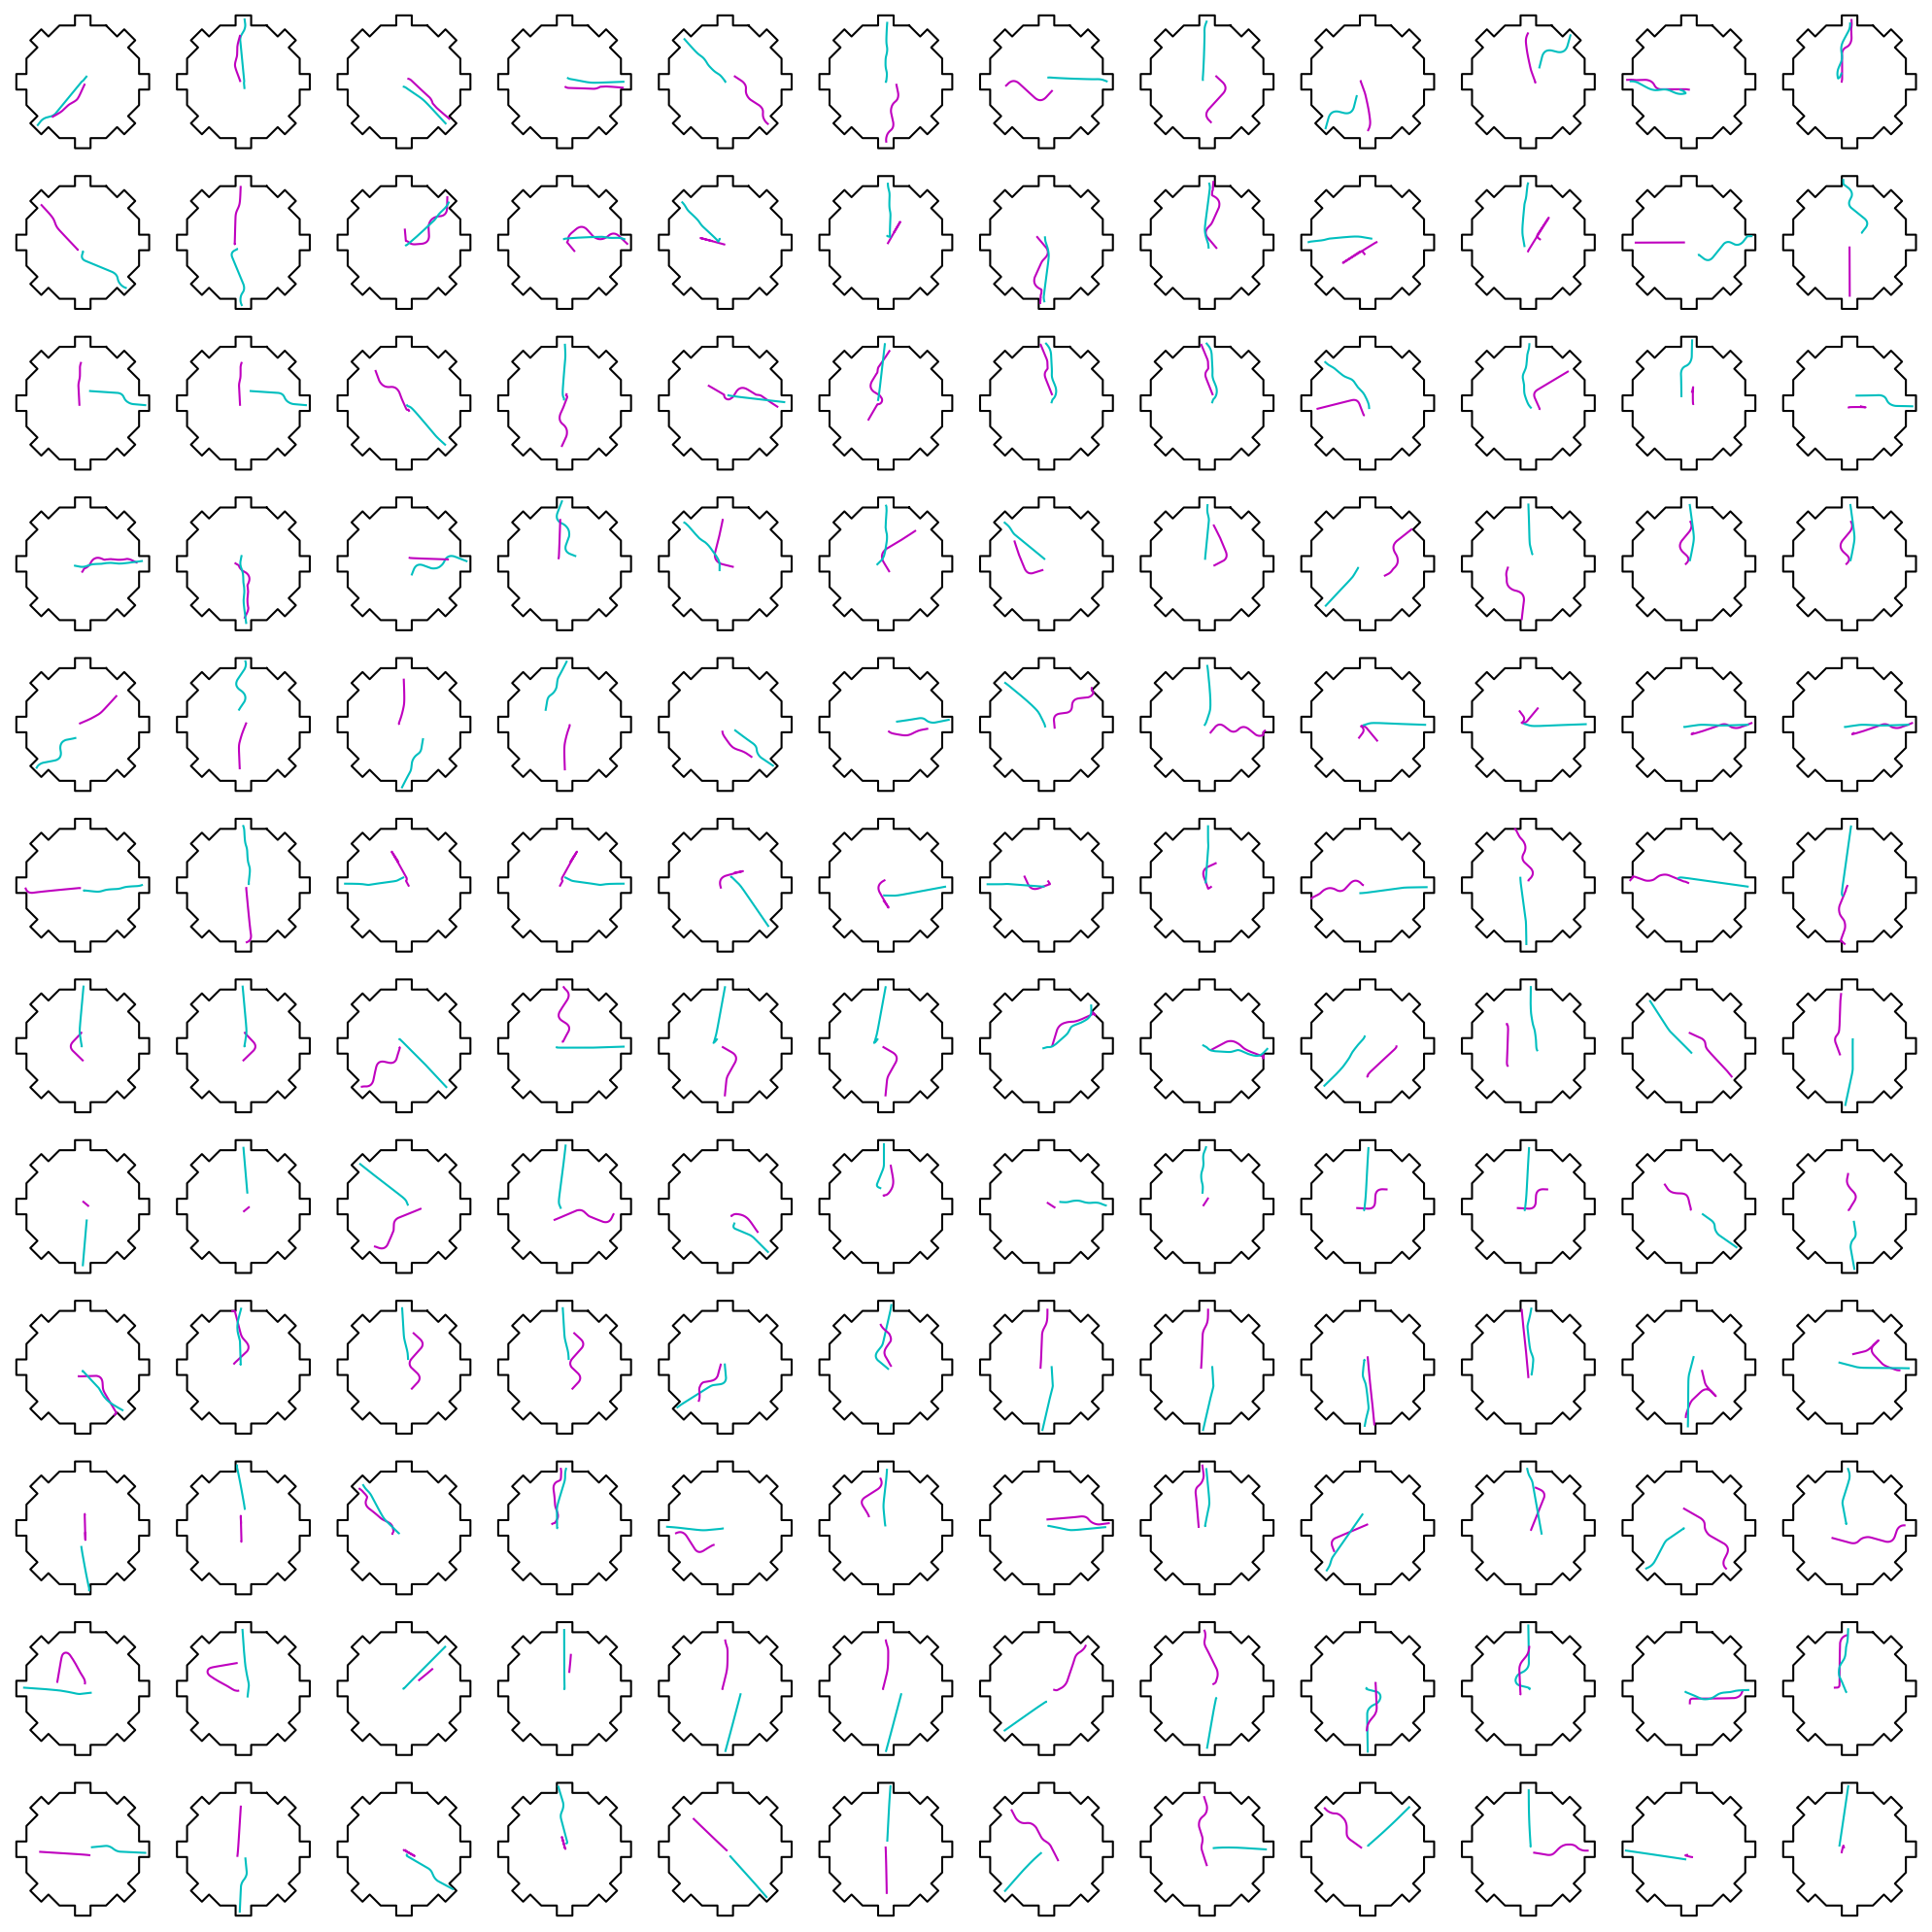

In [73]:
flipped_rotated_trajectory_testing_functions.plot_multiple_trials_flip_rotate_trajectories(trial_list_filtered,
                                                                                            chosen_walls_session,
                                                                                              flip=True,
                                                                                              trial_num_offset = 35)

In [9]:
print(f"High wall:\n {high_walls_session_reshaped}\n"), 
print(f"Low wall:\n {low_walls_session_reshaped}\n") 
print(f"Trial chosen wall:\n {chosen_walls_session_reshaped}")

High wall:
 [[ 5.  1.  3.  3.  2.  7.  3.  6.  8.  1.  7.  1.]
 [ 1.  6.  2.  7.  8.  2.  8.  4.  5.  8.  8.  2.]
 [ 2.  2.  8.  4.  7.  5.  4.  4.  6.  8.  8.  6.]
 [ 6.  8.  3.  5.  7.  8.  4.  8.  5.  7.  3.  1.]
 [ 4.  3.  1.  8.  7.  7.  3.  8.  8.  6.  1.  6.]
 [ 5.  2.  8.  5.  1.  3.  1.  6.  7.  7.  3.  1.]
 [ 6.  1.  8.  6.  4.  5.  8.  4.  3.  1.  8.  4.]
 [ 1.  6.  1.  5.  3.  5.  8.  7.  3.  6.  6.  7.]
 [ 2.  1.  2.  5.  3.  7.  4.  4.  8.  2.  7.  6.]
 [ 5.  3.  5.  7.  6.  1.  1.  8.  8.  6.  4.  4.]
 [ 8.  3.  2.  4.  3.  6.  7.  8.  1.  7.  1.  3.]
 [ 1.  4.  7.  4. nan nan nan nan nan nan nan nan]]

Low wall:
 [[ 6.  8.  7.  7.  1.  6.  4.  7.  7.  5.  6.  3.]
 [ 2.  2.  3.  6.  4.  3.  4.  8.  6.  4.  7.  6.]
 [ 4.  4.  4.  5.  3.  1.  8.  3.  7.  1.  4.  7.]
 [ 4.  4.  7.  6.  3.  4.  2.  6.  7.  6.  7.  3.]
 [ 8.  5.  2.  7.  1.  3.  4.  1.  7.  2.  3.  2.]
 [ 1.  4.  2.  3.  3.  7.  7.  4.  1.  3.  7.  7.]
 [ 4.  5.  2.  7.  8.  3.  6.  2.  4.  2.  4.  3.]
 [ 5. 